In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import functions 
classif = functions.classification()

In [4]:
attributes = pd.read_csv("/Users/conorosully/Documents/Legal-Case-Prediction/data/test/A6_Attributes.csv",index_col=0)
attributes.head(2)

,id,type,url,doc-name,doc-id-label,doc-date,vl-type,created-at,updated-at,app-no-parts,...,ecli,judgement-date,judges,last-modified-time,nonviolations,organisations,respondents,separate-opinion,violations,target
5,HUDOC-ECHR-1958-001-73860,eu-chrs,http://hudoc.echr.coe.int/app/conversion/docx/...,greece <br>v.<br> the united kingdom (volume ii),176/56,1958-09-26,eu_chr,2017-09-18T10:01:36.133Z,2018-10-26T16:54:03.876Z,"['176', '56']",...,ECLI:CE:ECHR:1958:0926REP000017656,NaN,NaN,2018-10-07,"['15', '15-1', '8', '5', '5-1', '1', '6', '6-2...","['International Court of Justice', 'Advisory C...",['GBR'],NaN,NaN,nonviolation
23,HUDOC-ECHR-1961-001-73439,eu-chrs,http://hudoc.echr.coe.int/app/conversion/docx/...,nielsen <br>v.<br> denmark,343/57,1961-03-15,eu_chr,2017-09-18T10:01:37.222Z,2018-10-26T16:54:02.326Z,"['343', '57']",...,ECLI:CE:ECHR:1961:0315REP000034357,NaN,NaN,2018-10-07,['6'],NaN,['DNK'],NaN,NaN,nonviolation


In [5]:
attributes['target'].value_counts()

violation       13239
nonviolation      963
Name: target, dtype: int64

In [6]:
year = [x.split("-")[0] for x in attributes['doc-date']]
attributes['year'] = year
attributes_1 = attributes[['year','target']]

unique_years = list(attributes_1['year'].unique())
no_violation = []
no_nonviolation = []
for year in unique_years:

    nv = len(attributes_1[(attributes_1['year']==year) & (attributes_1['target']=='nonviolation')])
    v = len(attributes_1[(attributes_1['year']==year) & (attributes_1['target']=='violation')])
    no_violation.append(v)
    no_nonviolation.append(nv)

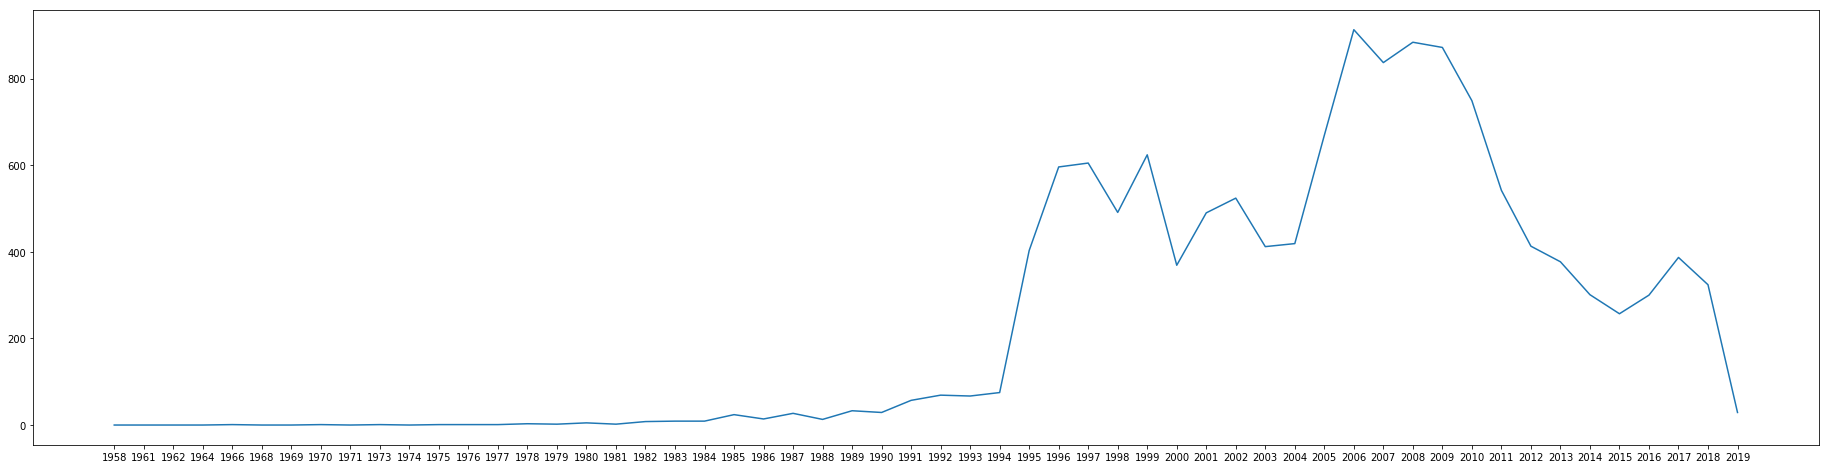

In [5]:
fig = plt.figure(figsize=(32,8))
plt.plot(unique_years,no_violation)

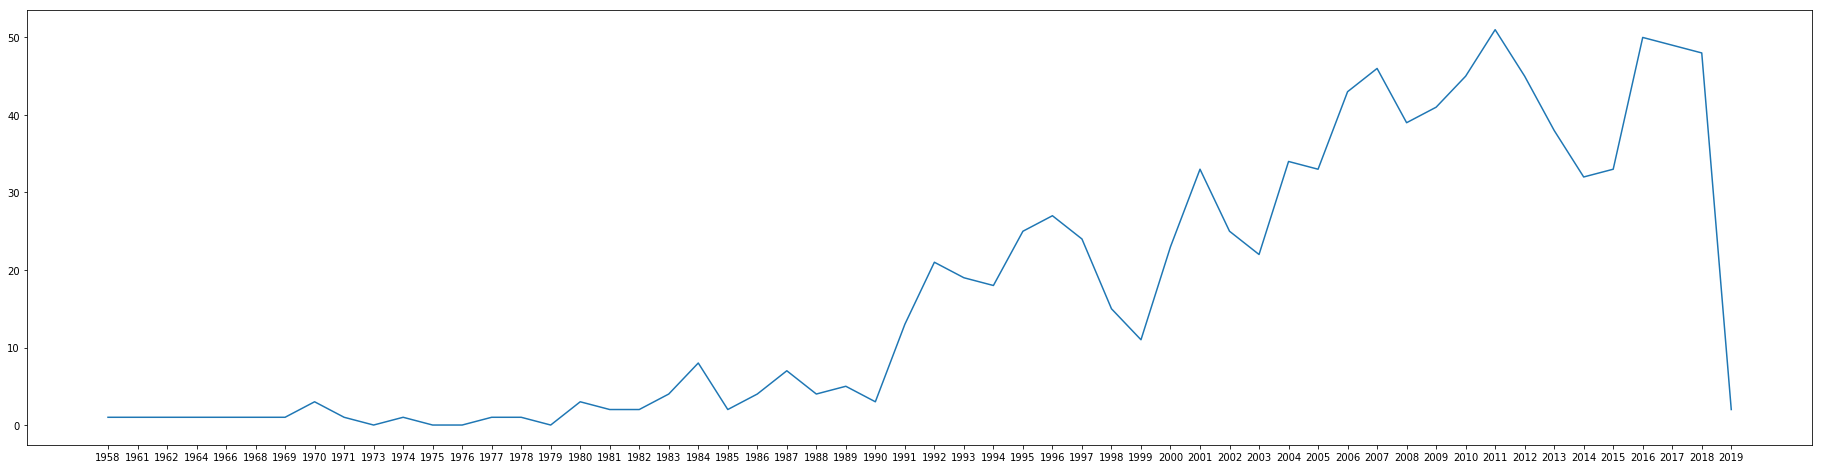

In [35]:
fig = plt.figure(figsize=(32,8))
plt.plot(unique_years,no_nonviolation)

In [5]:
features = pd.read_csv("/Users/conorosully/Documents/Legal-Case-Prediction/data/test/A6_features.csv",index_col=0)
features.head()

,able,able to,about,about the,above,absence,absence of,abuse,accepted,access,...,would,would be,would have,would not,written,year,years,years imprisonment,you,target
0,2,2,16,2,13,5,5,0,4,0,...,35,6,2,3,0,1,10,1,0,nonviolation
1,9,8,8,2,35,1,1,2,4,0,...,47,8,4,10,1,5,21,1,0,nonviolation
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,nonviolation
3,0,0,1,0,2,0,0,0,1,0,...,3,0,2,0,0,1,2,0,0,nonviolation
4,0,0,0,0,1,0,0,0,0,1,...,6,1,1,0,0,0,0,0,0,nonviolation


In [6]:
X = features.drop(columns='target')
y = features['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=90)
model = SVC()
model.fit(X_train,y_train)

/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
#AutoML 
#H20.ai - AutoML
#AUto SK learn
#Transfer learning 

In [8]:
predictions = model.predict(X_test)
results = classif.results(y_test,predictions)

0.7333333333333333
[[49  5]
 [23 28]]
              precision    recall  f1-score   support

nonviolation       0.68      0.91      0.78        54
   violation       0.85      0.55      0.67        51

   micro avg       0.73      0.73      0.73       105
   macro avg       0.76      0.73      0.72       105
weighted avg       0.76      0.73      0.72       105

